<a href="https://colab.research.google.com/github/MarcCampmanyGar/Nuclio_DS_Projects/blob/main/CIFAR_90_60_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Nuclio logo](https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png)

## 1. Librerias & Google Drive

Para empezar carguemos esas librerias que nos hacen falta

In [ ]:
from tensorflow import keras as ks
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

Incorporamos la carpeta de Google Drive para poder "guardar" nuestros modelos

1. Abrir barra lateral de Carpeta
2.  Hacer click en carpeta con logo de Google Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Arquitectura de red del modelo - Proyecto 0


In [ ]:
model = ks.Sequential()


model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.001),  padding='same', input_shape=(32,32,3), kernel_initializer='he_uniform'))
model.add(ks.layers.Conv2D(32, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.001),  padding='same', kernel_initializer='he_uniform'))
model.add(ks.layers.BatchNormalization())            
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.25))

model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.001), padding='same', kernel_initializer='he_uniform'))
model.add(ks.layers.Conv2D(64, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.001), padding='same', kernel_initializer='he_uniform'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.3))

model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.001), padding='same', kernel_initializer='he_uniform'))
model.add(ks.layers.Conv2D(128, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.001), padding='same', kernel_initializer='he_uniform'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.4))

model.add(ks.layers.Conv2D(256, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.001), padding='same', kernel_initializer='he_uniform'))
model.add(ks.layers.Conv2D(256, (3, 3), strides=1, activation='relu', kernel_regularizer=l2(0.001), padding='same', kernel_initializer='he_uniform'))
model.add(ks.layers.MaxPooling2D((2, 2)))
model.add(ks.layers.Dropout(0.5))

model.add(ks.layers.Flatten())
model.add(ks.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(ks.layers.BatchNormalization())            
model.add(ks.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)))

model.add(ks.layers.Dense(10, activation='softmax'))


Para revisar un modelo, nos basta con llamar al método **.summary()** del modelo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

## 3. Optimizador, función error


In [ ]:

# new_adam = Adam(learning_rate=0.0009)

my_sgd = SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer= my_sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Con weight decay, NUNCA USAR ADAM!!!!!!!!!!!!!!!!!!!!!!!!!!!

## 4. Preparamos los datos

Cargamos los datos de CIFAR10 de los datasets directamente de las librerias de Keras. Estos ya estan dispuestos en train and test

**Detalle importante:** 
> La red neuronal requiere que los inputs sean números reales, y lo haremos forzando la division de los valores de dentro de las matrices 28x28 (que tienen valoress del 0 al 255) por 255.0 (un real)

In [ ]:
cifar10 = ks.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train_scaled, x_test_scaled = x_train / 255.0, x_test / 255.0

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
y_train_label = y_train

y_test
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
pd.DataFrame(y_train).value_counts()

0    5000
1    5000
2    5000
3    5000
4    5000
5    5000
6    5000
7    5000
8    5000
9    5000
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64

In [ ]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

Obtenemos un array con todas las labels de CIFAR10

In [ ]:
cifar10_labels = [
'airplane', # id 0
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck',
]

print('Number of labels: %s' % len(cifar10_labels))

Number of labels: 10


Pintemos una muestra de las imagenes del dataset CIFAR10, a ver si se parece en algo a lo que esperamos.
Primero, vemos que tipos de datos tengo, después mapeamos esas matrices en una escala de grises utilizando el método **.get_cmap()** de PlotLy con los nueve primeros números del dataset.

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


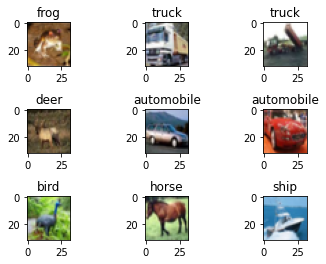

In [ ]:
# Pintemos una muestra de las las imagenes del dataset MNIST

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):

    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(cifar10_labels[y_train_label[i,0]])

plt.subplots_adjust(hspace = 1)
plt.show()

Como vamos a querer ir haciendo validación a la vez que entrenamos (muy practico)

In [ ]:
x_train_scaled = x_train_scaled[:-10000]
y_train = y_train[:-10000]

x_val_scaled = x_train_scaled[-10000:]
y_val = y_train[-10000:]

In [ ]:
pd.DataFrame(y_train).value_counts()

2    4048
7    4023
6    4020
4    4003
8    3997
0    3986
1    3986
3    3984
9    3978
5    3975
dtype: int64

Cuando añadimos convoluciones, necesitamos "pre-tratar los datos", porque **la convolución espera una matriz de 4 campos** (más parecido a "imagenes"), en el caso de MNIST. CIFAR10 ya tiene el shape adecuado, así que no tenemos que hacer nada, pero como siempre decimos: es mejor que comprobeis su tamaño.

Por eso, al salir de la Convolution, hay que hacer un Flatten, porque las capas FullDense esperan arrays, no matrices!!

Luego lo imprimimos para ver que todo está correcto

In [ ]:
# Validamos el resultado
print('Train: X=%s, y=%s' % (x_train_scaled.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val_scaled.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test_scaled.shape, y_test.shape))

Train: X=(40000, 32, 32, 3), y=(40000, 1)
Validation: X=(10000, 32, 32, 3), y=(10000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


## Data Augmentation

**De entrenamiento**

Aquí incluiremos nuestra parte de generación de imagenes (con código de partida)

In [ ]:
x_train = x_train[:-10000]

x_val = x_train[-10000:]


In [ ]:
x_train.shape , y_train.shape

((40000, 32, 32, 3), (40000, 1))

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [6],
       [2],
       [8]], dtype=uint8)

In [ ]:
y_train_rshape = y_train.ravel()
y_val_rshape = y_val.ravel()
y_test_rshape = y_test.ravel()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train_rshape)
y_train_encoded = le.transform(y_train_rshape)
y_val_encoded = le.transform(y_val_rshape)
y_test_encoded = le.transform(y_test_rshape)

In [ ]:
y_train_encoded

array([6, 9, 9, ..., 6, 2, 8])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    zoom_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    )

train_generator = train_datagen.flow(
    x_train, 
    y_train_encoded, 
    batch_size=400
)

**De validacion y test**

Fijaos que aquí la única modificación es un re-escalado, nada de modificaciones

In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
    )
validation_generator = validation_datagen.flow(
    x_val, 
    y_val_encoded, 
    batch_size=100
)


test_datagen = ImageDataGenerator(
    rescale=1./255
    )
test_generator = test_datagen.flow(
    x_test, 
    y_test_encoded,
    batch_size=100
)

### Data augm generators

A rellenar para ver que nos da el generador de imagenes nuevas

In [ ]:
sample = np.random.choice(range(0,1457))

example_generator = train_datagen.flow(
    x_train[sample:sample+1],
    y_train_encoded[sample:sample+1],
    batch_size=20
    )

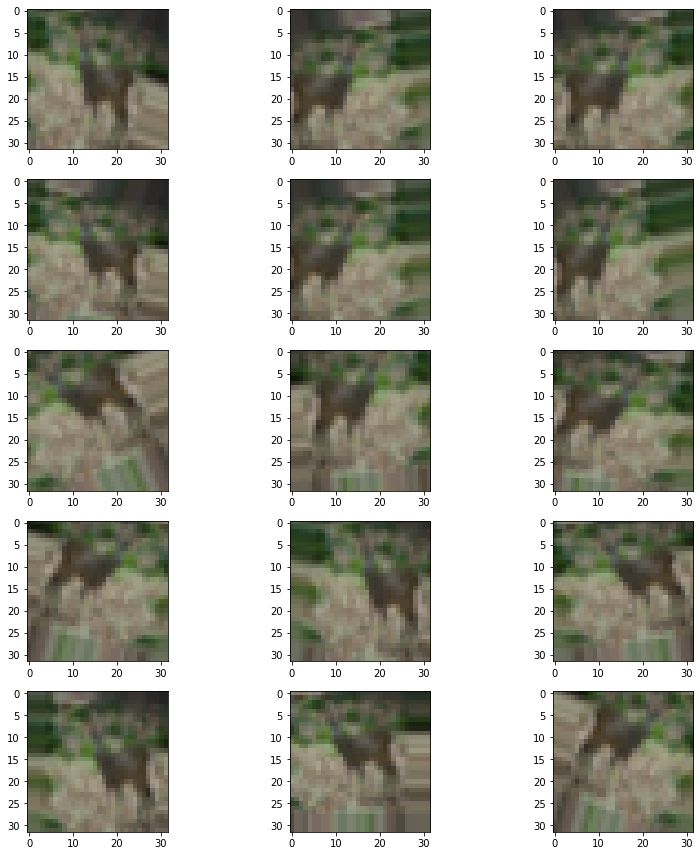

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X, Y in example_generator:
        image = X[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

## 5. Entrenamiento

Ya podemos ponernos a entrenar el modelo!! Ojo, que hemos de entrenar contra los datos convertidos al formato que espera la Convolution.

Empezaremos con 30 epocs, es decir, 30 pasadas completas del dataset (que a su vez sera con mini-batches internamente), fijando un batch de 64

El metodo .fit() nos permite, definir además si disponemos de varias CPUs, GPUs, y si queremos ir validando datos a cada fin de epoch.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# callback_val_accuracy = EarlyStopping(monitor="val_accuracy", patience=20)
callback_val_loss = EarlyStopping(monitor="val_loss", patience=5)

In [ ]:
# ruta_checkpoint = '/tmp/checkpoint'

# callback_checkpoint = ModelCheckpoint(filepath=ruta_checkpoint,
#                                       save_weights_only=True,
#                                       monitor='val_accuracy', # Monitorizamos la accuracy de validacion
#                                       mode='max', # Nos quedamos con el modelo con mayor accuracy
#                                       save_best_only=True)

In [ ]:
t = time.perf_counter()

In [ ]:
# history = model.fit(x_train_scaled, y_train, epochs=300, 
#                     use_multiprocessing=False, batch_size= 218, 
#                     validation_data=(x_val_scaled, y_val)
#                     )
                    # callbacks=[callback_val_loss, callback_val_accuracy])

In [ ]:
####Con data augmentation

# history = model.fit(train_generator, 
#                     epochs=200, 
#                     validation_data=validation_generator,
#                     use_multiprocessing=False,
#                     steps_per_epoch=100, 
#                     validation_steps=100, callbacks=[callback_val_loss, callback_val_accuracy])

In [ ]:

acc_max = 0
acc = 0
while acc < 0.90:
  # history = 
  model.fit(train_generator, steps_per_epoch = 100, 
                      validation_steps=100, use_multiprocessing=False,
                      epochs=1, validation_data=validation_generator,
                      callbacks=[callback_val_loss])
  
  _, acc = model.evaluate(test_generator, verbose=0)

  if acc > acc_max:
    acc_max = acc
    model.save('model_DA_2.h5')
    print('> %.3f' % (acc * 100.0)) 

100/100 [==============================] - 29s 196ms/step - loss: 5.5507 - accuracy: 0.1385 - val_loss: 5.4855 - val_accuracy: 0.1009
> 10.040
100/100 [==============================] - 20s 197ms/step - loss: 5.3181 - accuracy: 0.1791 - val_loss: 5.6829 - val_accuracy: 0.1071
> 10.670
100/100 [==============================] - 19s 187ms/step - loss: 5.2004 - accuracy: 0.2072 - val_loss: 5.5287 - val_accuracy: 0.1228
> 12.250
100/100 [==============================] - 19s 188ms/step - loss: 5.1253 - accuracy: 0.2260 - val_loss: 5.3450 - val_accuracy: 0.1619
> 16.250
100/100 [==============================] - 20s 199ms/step - loss: 5.0699 - accuracy: 0.2411 - val_loss: 5.2404 - val_accuracy: 0.1844
> 18.060
100/100 [==============================] - 19s 188ms/step - loss: 5.0209 - accuracy: 0.2535 - val_loss: 5.2142 - val_accuracy: 0.2005
> 19.590
100/100 [==============================] - 19s 188ms/step - loss: 4.9758 - accuracy: 0.2636 - val_loss: 5.1823 - val_accuracy: 0.2152
> 21.050

In [ ]:
elapsed_time = datetime.timedelta(seconds=(time.perf_counter() - t))

print('Tiempo de entrenamiento:', elapsed_time)

Tiempo de entrenamiento: 12:47:29.817630


## 6. Evaluamos los resultados

Obtengamos una grafica de como el error y la accuracy van evolucionando en cada epoch en los datos de entrenamiento y en la validación

In [ ]:
_, acc = model.evaluate(x_test_scaled, y_test, verbose=0)
print('> %.3f' % (acc * 100.0))     # Esta es la métrica que se validará

> 90.060


In [ ]:
model.save('model_DA_2.h5')

In [ ]:
model.evaluate(test_generator, verbose=0)

[0.458286315202713, 0.900600016117096]

NameError: ignored

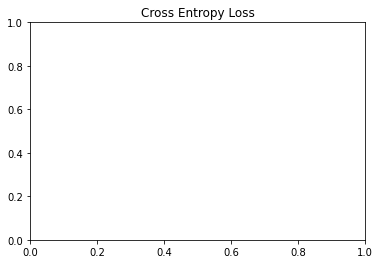

In [ ]:
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()
plt.show()

plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label[0]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')

Dibujamos las primeras imagenes, con las predicciones y sus valores reales (un total de 20 imagenes, para no abusar de vuestros laptops)

Coloreamos las prediciones correctas en azul y los fallos en rojo. Aunque primero he impreso las etiquetas para que tengamos una referencia al grafico.

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


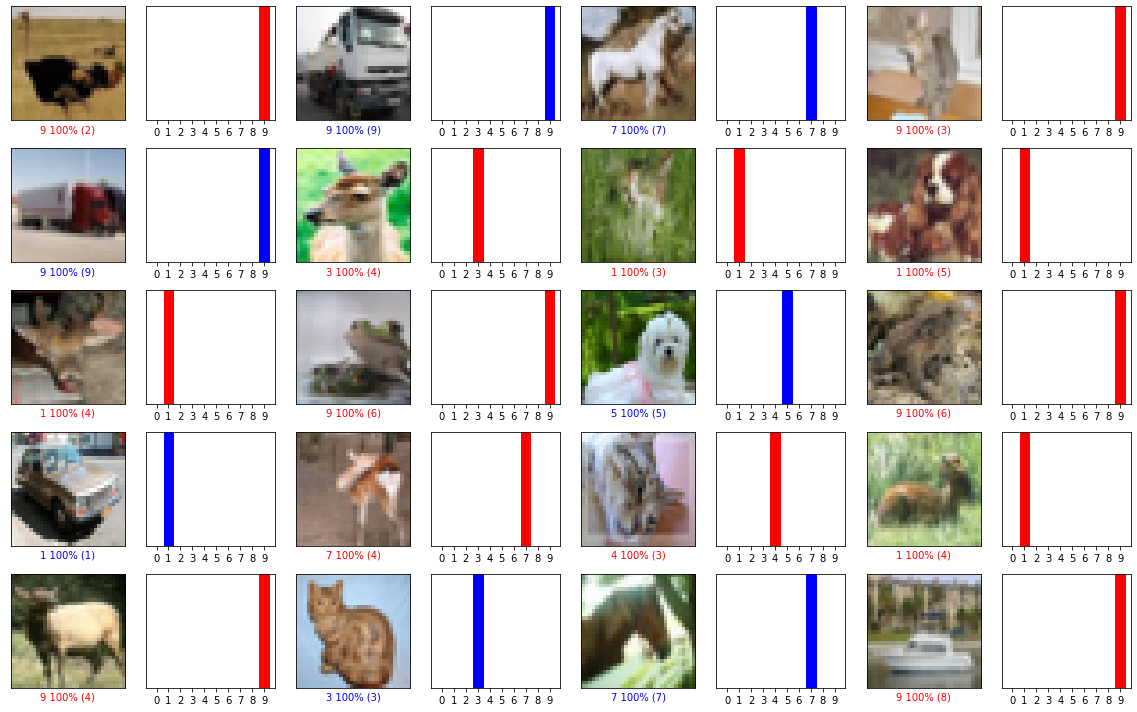

In [ ]:
i = 0
for l in cifar10_labels:
    print(i, l)
    i += 1

num_rows = 5
num_cols = 4
start = 450
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+start, predictions[i+start], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+start, predictions[i+start], y_test)
plt.tight_layout()
plt.show()

## 7. Guardamos el modelo para futuras evaluaciones

Id cambiando los nombres del archivo para ir guardando los diversos proyectos.
Aquí lo guardamos en "local", pero recordad que lo ideal es que lo guardeis en Google Drive (teneis que montar la unidad, fijar la ruta y allí guardar el modelo .h5)

In [ ]:
# ruta_googledrive = "/content/drive/MyDrive/" # A revisar en vuestra instancia

# model.save(ruta_googledrive+'cifar10_base_model.h5')

In [ ]:
# para hacer data augmentation, tendremos que hacer un ravel